# Exercise 3 | TKO_7092 Evaluation of Machine Learning Methods 2024
## deadline: 14.2.2024 - 23:59

Regarding any questions about this exercise, please contact course assistant Jonne Pohjankukka (jjepoh@utu.fi)

********************************************

Student name: Faiza Anan Noor

Student number: 2306676

Student email: fanoor@utu.fi

********************************************

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Water permeability prediction in forestry <br>

In this task, the client wants you to estimate the spatial prediction performance of K-nearest neighbor regression model with K=15 (15NN), using spatial leave-one-out cross-validation (i.e. SKCV, with number of folds == number of data points). The client wants you to use the C-index as the performance measure.  

In other words, the client wants you to answer the question: "What happens to the prediction performance of water permeability using 15-nearest neighbor regression model, when the geographical distance between known data and unknown data increases?".

In this task, you have three data files available (with 1691 data points):

- input.csv, contains the 75 predictor features.
- output.csv, contains the water permebility values.
- coordinates.csv, contains the corresponding geographical coordinate locations of the data points. The unit of the coordinates is metre, and you can use Euclidean distance to calculate distances between the coordinate points.

Implement the following tasks to complete this exercise:

********************************************

#### 1. Z-score standardize the predictor features (input.csv).

#### 2. Perform spatial leave-one-out cross-validation with 15NN model for the provided data set (refer to the lectures 3.1.3 and 3.1.4 for help). Estimate the water permeability prediction performance (using 15NN model and C-index) with the following distance parameter values: d = 0, 10, 20, ..., 250 (that is, 10 meter intervals from 0m to 250m).

#### 3. When you have calculated the C-index performance measure for each value of d, visualize the results with the C-index (y-axis) as a function of d (x-axis).

********************************************

Your .ipynb-file must include the following:

- Your own implementation of the spatial leave-one-out cross-validation for the current task. You can use third-party libraries (e.g. Scikit-learn) if you want for implementing e.g. the 15-nearest neighbor. Also, try to follow good programming practices and add comments to relevant parts of your code explaining what you are doing and why.


- Plot of the graph C-index vs. distance parameter value.


<br><br><br>
-- START IMPLEMENTING YOUR EXERCISE AFTER THIS LINE --
<br><br><br>

### Import necessary libraries

In [2]:
# In this cell, import all the libraries that you need. For example:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor





### Read in the datasets

In [3]:
# In this cell, read the files input.csv, output.csv and coordinates.csv.
# Print out the dataset dimesions (i.e. number of rows and columns).

# Load the data
input_data = pd.read_csv('/content/drive/MyDrive/input.csv',  header=None)
output_data = pd.read_csv('/content/drive/MyDrive/output.csv',  header=None)
coordinates = pd.read_csv('/content/drive/MyDrive/coordinates.csv',  header=None)
print("Input Data dimensions: ",input_data.shape)
print("Output Data dimensions: ",output_data.shape)
print("Coordinates Data dimensions: ",coordinates.shape)


Input Data dimensions:  (1691, 75)
Output Data dimensions:  (1691, 1)
Coordinates Data dimensions:  (1691, 2)


In [4]:
coordinates

,0,1
0,459140.0,7524200.0
1,461590.0,7549000.0
2,462040.0,7549300.0
3,462040.0,7549300.0
4,462130.0,7549400.0
...,...,...
1686,513840.0,7547100.0
1687,514920.0,7556000.0
1688,514990.0,7555500.0
1689,515000.0,7556300.0


### Standardization of the predictor features (input.csv)

In [5]:
# Standardize the predictor features (input.csv) by removing the mean and scaling to unit variance.
# In other words, z-score the predictor features. You are allowed to use third-party libraries for doing this.

# Z-score standardization of the input data keeping it in scaled_data
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(input_data))

### Functions and analysis code

In [6]:
# Include here all the functions and other relevant code that you need in order to implement the task.

# Note! Utilize the following two functions in your implementation:

### Function for calculating C-index ###
# y: array containing true label values.
# yp: array containing the predicted label values.
def cindex(y, yp):
    n = 0
    h_num = 0
    for i in range(0, len(y)):
        t = y[i]
        p = yp[i]
        for j in range(i+1, len(y)):
            nt = y[j]
            np = yp[j]
            if (t != nt):
                n = n + 1
                if (p < np and t < nt) or (p > np and t > nt):
                    h_num += 1
                elif (p == np):
                    h_num += 0.5
    return h_num/n


### Function for calculating the pairwise spatial distances between the data points ###
# The function will return a n-by-n matrix of Euclidean distances. For example, the
# distance_matrix element at indices i,j will contain the spatial distance between
# data point i and j. Note that the element value is 0 always when i==j.
# coordinate_array: n-by-2 array containing the coordinates of the exercise data points.
def cdists(coordinate_array):
    number_of_observations = coordinate_array.shape[0]
    distance_matrix = np.zeros((number_of_observations, number_of_observations))
    for i in range(0, number_of_observations):
        distance_matrix[i, :] = np.sqrt(np.sum((coordinate_array - coordinate_array[i])**2, axis=1))
    return distance_matrix

### Results for spatial leave-one-out cross-validation with 15-nearest neighbor regression model

In [ ]:
# Define distance parameter values from 0 to 250 in 10-meter(m) intervals

d_values = np.arange(0, 251, 10)  # Distance parameter values
# Perform spatial leave-one-out cross-validation with 15NN model

dist = cdists(coordinates.values) # calculate a distance from the data points to the rest
X=scaled_data.values #(Getting scaled_data input values only from dataframe)
y=output_data.values #(Getting output values only from dataframe)
c_index_scores=[] #Keeping an array for storing Cindex vallues for different distance paramter values

for d in d_values:
    predictions=[]  # 2 arrays for keeping predictions and answers for a particular delta value
    answers=[]

    for i in range(len(X)):
        X_test = X[i].reshape(1, -1)
        # Exclude the current data point from the dataset

        # Storing only the X_train, y_train for which distance from data point to the next is greater than specified delta value
        X_train = X[dist[i] > d]
        y_train = y[dist[i] > d]

        y_test = y[i].reshape(1, -1)

        # Fit K-nearest neighbor regression model with distance metric set as Euclidean
        knn_model = KNeighborsRegressor(n_neighbors=15, metric='euclidean')
        knn_model.fit(X_train, y_train)

        # Storing results after testing on test set
        y_pred = knn_model.predict(X_test)
        predictions.append(y_pred)
        answers.append(y_test)

# Storing the cindex for a particular iterations and also appending to the total list of cindex values to be plotted later against distance parameter values
    c_index_per_iteration=cindex( answers, predictions)
    c_index_scores.append((c_index_per_iteration))

    #print("C index scores: ", c_index_scores)




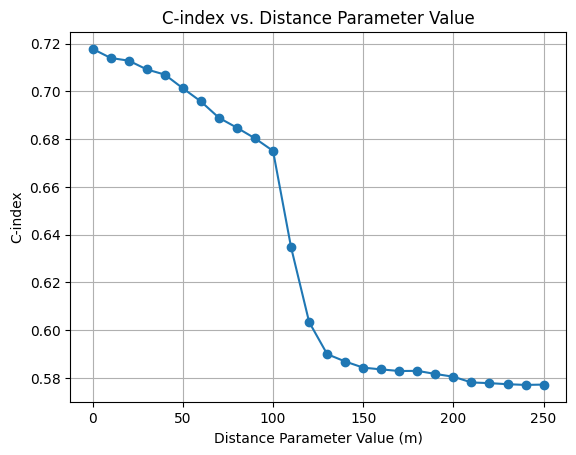

In [8]:
# Visualize the results with C-index as a function of distance parameter value
plt.plot(d_values, c_index_scores, marker='o')
plt.title('C-index vs. Distance Parameter Value')
plt.xlabel('Distance Parameter Value (m)')
plt.ylabel('C-index')
plt.grid(True)
plt.show()

In [9]:
d_values

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250])

In [10]:
c_index_scores

[0.7177592537892203,
 0.7139584841158626,
 0.7128466014959494,
 0.709170424272289,
 0.7070054554693985,
 0.7012710529741898,
 0.6957557372023255,
 0.6889227512812723,
 0.6847534539406912,
 0.6803111731429076,
 0.6750586914432986,
 0.6346620394804074,
 0.6034110332913826,
 0.5899749975151506,
 0.5868906344275537,
 0.5843228400358939,
 0.5835843847862819,
 0.5829103256342666,
 0.5829778715409846,
 0.581672800628282,
 0.5805210204261622,
 0.5781226157694843,
 0.5778366830970043,
 0.5773890602229504,
 0.5770887784200277,
 0.5772333196608286]

### Interpretation of the results

In [12]:
# In this cell, give a brief commentary on the results, what happens to the prediction
# performance as the prediction distance increases?


The greatest c-index values appear to be between 0.68 and 0.72 and as the distance increases, the performance drops. The model appears to be unreliable for predicting data points that are more than 100 meters away from the training set, as evidenced by the notable decline in performance at this distance.

This means that until the distance parameter value is greater than 100, the C-Index appears to be appropriate. Delta > 100 results in a sharp decline in accuracy, indicating that accuracy decreases with increasing distance between known and unknown data points. It seems that when we take into account a larger distance parameter, more data points are excluded from the training set, which lowers the cindex function's performance because it is less optimistic.
